<a href="https://colab.research.google.com/github/hargurjeet/Maersk/blob/main/Solution_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Maersk Vessel Shipment Data  - EDA**

The purpose of this task is to give us a gauge of your skills and experience as a data scientist.

The Following notebook is used for EDA and Visualizaitons. A seprate notebook is developed for ml modelling.

# **Table Of Contents**<a name="top"></a>


---



---


  1. [About the Dataset](#1)
  2. [Loading the dataset Preprocessing](#2)
  3. [Understanding Indiviual Features](#3)
  4. [EDA -  Asking Questions](#4)
  5. [Summary](#5)
  6. [Future Work](#6)
  7. [Reference](#7)

# 1: AboutDataset <a name="1"></a>


---
<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

The dataset primiarly conatins the vessel transport information across various geographies. The dataset contains the following features

- 'call_id': ID variable to identify a Vessel at a Port.
- 'arrival_date': arrival date of a vessel at a port.
- 'departure_date': departure date of a vessel at a port.
- 'arrival_time': arrival timestamp of a vessel at a port.
- 'departure_time': departure timestamp of a vessel at a port.
- 'imo': Vessel identifier
- 'vessel_name’: Name of the vessel
- 'vessel_type’: Type of the vessel
- 'Country': Name of the country
- 'CountryCode': Identifier of the Country
- 'Port': Name of The Port
- 'Terminal': Name of the Terminal
- 'Duration': Duration of vessel stay in a Port
- 'Service_name': Name of the service
- 'length': vessel length
- 'vesteu': capacity of a vessel
- 'prev_departure_time': departure time of a vessel from the previous port.
- 'prev_port': Previous port visited by the vessel
- 'prev_arrival_time': arrival time of a vessel at the previous port.
- 'prev_duration': Duration of vessel stay in previous Port
- 'prev_leg_duration': Time taken to travel from previous port to current port
- 'prev_leg_distance_nm': Distance travelled from previous port to current port
- 'prev_leg_stationary_hours': waiting time at the vicinity of Port to get a place to unload the cargo
- 'prev_call_id': ID variable to identify a Vessel at its previous Port.
- 'next_port': Next port visited by the vessel
- 'next_arrival_time': arrival time of a vessel at the next port.
- 'next_duration': Duration of vessel stay in next Port.
- 'next_leg_duration': Time taken to travel from current port to next port
- 'next_leg_distance_nm': Distance travelled from current port to next port
- 'next_leg_stationary_hours': waiting time at the vicinity of next Port to get a place to unload the cargo.
- 'next_call_id': ID variable to identify a Vessel at its next Port.

# 2: Loading the dataset Preprocessing <a name="2"></a>


---
<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

The dataset has been loaded on my github [repo](https://github.com/hargurjeet/Maersk).

I also import other standard imports to perfrom data analysis, model building...etc

In [2]:
!pip install -q gitpython

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.0 MB/s eta 0:00:00


In [48]:
## Libraries to import data and preprocessing
import pandas as pd
import numpy as np
from git import Repo
import os

## Libraires for building visuals
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [4]:
# Clone the GitHub repository
repo_url = 'https://github.com/hargurjeet/Maersk'
repo_dir = 'Maersk'
Repo.clone_from(repo_url, repo_dir)

<git.repo.base.Repo '/content/Maersk/.git'>

In [5]:
## Acessing the vessel data
file_path  = "/content/Maersk/Vessel_journey_data.csv"
date_cols = ['arrival_date', 'departure_date',
             'arrival_time', 'departure_time', 'prev_arrival_time', 'prev_departure_time', 'next_arrival_time']
dtypes = {
    'imo' : 'object',
}

vessel_data = pd.read_csv(file_path, parse_dates=date_cols,dtype = dtypes)

pd.set_option('display.max_columns', None)
vessel_data.head(2)

,call_id,arrival_date,departure_date,arrival_time,departure_time,imo,vessel_name_ais,vessel_type_ais,Country,CountryCode,Port,Terminal,Duration,Service_name,length,prev_departure_time,vesteu,prev_port,prev_arrival_time,prev_duration,prev_leg_duration,prev_leg_distance_nm,prev_leg_stationary_hours,prev_call_id,next_port,next_arrival_time,next_duration,next_leg_duration,next_leg_distance_nm,next_leg_stationary_hours,next_call_id
0,7b75a18f54d78c79df4e9ceb29c65c60d6b5c7ae,2022-01-05,2022-01-07,2022-01-05 23:00:19+00:00,2022-01-07 21:04:26+00:00,9525376,SAFMARINE CHAMBAL,Container Ship,China,CN,Xiamen,Xiamen Songyu Container Terminal,46.068611,ML - TPX,249.12,2021-12-14 07:00:05+00:00,4496,Haiphong,2021-12-13 17:02:55+00:00,13.952778,544.003889,1598.620103,28,705238686bb73f1947352631d015ad9485d78a9c,Los Angeles,2022-02-10 12:01:14+00:00,207.020556,806.946667,7407.903024,201.0,c77797c9b9822d7a799e6f7664f7d6be5f73f270
1,c77797c9b9822d7a799e6f7664f7d6be5f73f270,2022-02-10,2022-02-19,2022-02-10 12:01:14+00:00,2022-02-19 03:02:28+00:00,9525376,SAFMARINE CHAMBAL,Container Ship,United States,US,Los Angeles,Apmt Pier 400,207.020556,ML - TPX,249.12,2022-01-07 21:04:26+00:00,4496,Xiamen,2022-01-05 23:00:19+00:00,46.068611,806.946667,7407.903024,201,7b75a18f54d78c79df4e9ceb29c65c60d6b5c7ae,Qingdao,2022-03-08 22:27:41+00:00,105.949167,427.420278,5967.080241,25.0,0dccb61f51069f40de6592464459777a2eb73334


In [6]:
vessel_data.columns

Index(['call_id', 'arrival_date', 'departure_date', 'arrival_time',
       'departure_time', 'imo', 'vessel_name_ais', 'vessel_type_ais',
       'Country', 'CountryCode', 'Port', 'Terminal', 'Duration',
       'Service_name', 'length', 'prev_departure_time', 'vesteu', 'prev_port',
       'prev_arrival_time', 'prev_duration', 'prev_leg_duration',
       'prev_leg_distance_nm', 'prev_leg_stationary_hours', 'prev_call_id',
       'next_port', 'next_arrival_time', 'next_duration', 'next_leg_duration',
       'next_leg_distance_nm', 'next_leg_stationary_hours', 'next_call_id'],
      dtype='object')

In [7]:
## acesssing geo data
geo_data = pd.read_csv("/content/Maersk/Geographical Data.csv")
geo_data.head()

,CountryCode,Country,PORT_UNLOCODE,PORT,LATITUDE,LONGITUDE
0,CZ,Czech Republic,CZKR2,Kropacova Vrutice,50.33060,14.71620
1,GB,United Kingdom,GB2WW,Farlington Hants,50.85000,-1.02000
2,RO,Romania,ROHN5,Sangeru,45.13238,26.34561
3,ES,Spain,ESFTC,Fontcoberta Girona,42.13000,2.80000
4,KG,Kyrgyzstan,KG6IA,Dzhalal-Abad,40.93400,73.00700


In [8]:
geo_data_port_lat_long = geo_data.groupby(by=['Country', 'PORT']).agg({'LATITUDE': 'max', 'LONGITUDE': 'max'}).reset_index()
geo_data_port_lat_long

,Country,PORT,LATITUDE,LONGITUDE
0,Afghanistan,Ali Shirzayi,31.698600,66.628300
1,Afghanistan,Altimur,33.827000,69.082000
2,Afghanistan,Asadabad,34.866000,71.150010
3,Afghanistan,Aybak,36.261000,68.040000
4,Afghanistan,Bagram,34.970000,69.280000
...,...,...,...,...
133423,Zimbabwe,WILLOWVALE,-17.883333,30.966667
133424,Zimbabwe,WORKINGTON,-17.854458,31.001971
133425,Zimbabwe,Westgate,-17.764418,30.973292
133426,Zimbabwe,ZVISHAVANE,-20.333333,30.033333


In [9]:
print(vessel_data.shape, geo_data.shape)

(1131992, 31) (142765, 6)


In [10]:
vessel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1131992 entries, 0 to 1131991
Data columns (total 31 columns):
 #   Column                     Non-Null Count    Dtype              
---  ------                     --------------    -----              
 0   call_id                    1131992 non-null  object             
 1   arrival_date               1131992 non-null  datetime64[ns]     
 2   departure_date             1131992 non-null  datetime64[ns]     
 3   arrival_time               1131992 non-null  datetime64[ns, UTC]
 4   departure_time             1131992 non-null  datetime64[ns, UTC]
 5   imo                        1131992 non-null  object             
 6   vessel_name_ais            1131992 non-null  object             
 7   vessel_type_ais            1131366 non-null  object             
 8   Country                    1131992 non-null  object             
 9   CountryCode                1130921 non-null  object             
 10  Port                       1131992 non-nul

In [11]:
geo_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142765 entries, 0 to 142764
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   CountryCode    142643 non-null  object 
 1   Country        142765 non-null  object 
 2   PORT_UNLOCODE  142765 non-null  object 
 3   PORT           142764 non-null  object 
 4   LATITUDE       142765 non-null  float64
 5   LONGITUDE      142765 non-null  float64
dtypes: float64(2), object(4)
memory usage: 6.5+ MB


Observations -
- Dataset contains few columns with null values
- The parsed columns looks fine

In [12]:
vessel_data.describe()

,arrival_date,departure_date,Duration,length,vesteu,prev_duration,prev_leg_duration,prev_leg_distance_nm,prev_leg_stationary_hours,next_duration,next_leg_duration,next_leg_distance_nm,next_leg_stationary_hours
count,1131992,1131992,1.131992e+06,1.129635e+06,1.131992e+06,1.126872e+06,1.128073e+06,1.127880e+06,1.131992e+06,1.116443e+06,1.116443e+06,1.116236e+06,1.116443e+06
mean,2023-01-07 13:52:38.558011392,2023-01-08 14:44:53.404194048,2.508703e+01,1.878838e+02,2.600317e+03,2.510840e+01,4.330027e+02,2.574489e+03,1.126236e+02,2.458175e+01,3.306330e+02,2.059324e+03,9.107310e+01
min,2022-01-01 00:00:00,2022-01-01 00:00:00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,-1.267578e+02,0.000000e+00,0.000000e+00,1.000000e+00,-2.030106e+02,0.000000e+00,0.000000e+00
25%,2022-07-10 00:00:00,2022-07-11 00:00:00,8.965278e+00,1.344400e+02,0.000000e+00,8.966667e+00,2.797861e+01,1.422531e+02,1.000000e+00,8.961389e+00,2.720111e+01,1.393792e+02,1.000000e+00
50%,2023-01-15 00:00:00,2023-01-16 00:00:00,1.595083e+01,1.750000e+02,1.100000e+03,1.595083e+01,7.499083e+01,5.719228e+02,1.000000e+01,1.580583e+01,7.329500e+01,5.592997e+02,1.000000e+01
75%,2023-07-09 00:00:00,2023-07-10 00:00:00,2.703194e+01,2.290000e+02,2.940000e+03,2.702694e+01,1.939728e+02,1.517792e+03,4.500000e+01,2.700000e+01,1.850211e+02,1.473006e+03,4.300000e+01
max,2023-12-31 00:00:00,2024-03-20 00:00:00,7.741002e+03,9.010000e+02,2.434600e+04,1.380394e+04,5.932889e+04,3.678599e+05,2.394700e+04,7.741002e+03,1.899240e+04,1.537870e+05,1.380500e+04
std,NaN,NaN,4.446823e+01,8.065368e+01,3.919453e+03,4.737493e+01,1.564345e+03,8.560906e+03,4.631940e+02,4.223777e+01,9.834795e+02,5.477103e+03,3.273199e+02


Key Insights -
- Duration of the vessel on the port varies from 1 to 27 days upto 75 percentile of data. The higher number seems to be incorrect for the moment. This should be verified.
- The minimum values of vessel is 0 for some records which seems incorrect.
- vesteu which is the capacity of the vessel, I observe minimum value is 0 and 25 percentile of records contain values as 0 which seems incorrect as a vessel can not have 0 capacity.
- Previous duration and previous leg duration have a very high max values. It would be worth to get it verfied.
- Pervious leg duration also have negative values which I believe doesnot make sense, same applies for next leg duration
- Next leg distance have zero values which seems incorrect.
- By seeing the arrival date the data is from jan 2022 to till dec 2023 i.e. 2 years

In [13]:
## Dataset records before cleaning
print('Record Count Before Cleaning', vessel_data.shape)

def data_cleanup(df):

  return df[(df.length > 0) & (df.vesteu > 0) & (df.prev_leg_duration > 0) & (df.prev_leg_distance_nm > 0) &
      (df.prev_leg_stationary_hours > 0) &(df.next_leg_duration > 0)& (df.next_leg_distance_nm > 0) &(df.next_leg_stationary_hours > 0)]

vessel_data_cleaned_v1 = data_cleanup(vessel_data)

print('Record Count After Cleaning', vessel_data_cleaned_v1.shape)

Record Count Before Cleaning (1131992, 31)
Record Count After Cleaning (494468, 31)


In [14]:
print('Record Count Before Cleaning', vessel_data.shape)

def data_cleanup(df):

  return df[(df.length > 0) & (df.vesteu > 0) & (df.prev_leg_duration > 0) & (df.prev_leg_distance_nm > 0) &
            (df.next_leg_duration > 0)& (df.next_leg_distance_nm > 0)]

vessel_data_cleaned_v2 = data_cleanup(vessel_data)

print('Record Count After Cleaning', vessel_data_cleaned_v2.shape)

Record Count Before Cleaning (1131992, 31)
Record Count After Cleaning (762300, 31)


In [15]:
data_loss_v1 = ((vessel_data.shape[0] - vessel_data_cleaned_v1.shape[0])/vessel_data.shape[0])*100
data_loss_v2 = ((vessel_data.shape[0] - vessel_data_cleaned_v2.shape[0])/vessel_data.shape[0])*100
print(data_loss_v1, data_loss_v2)

56.31877257083089 32.65853468929109


In [16]:
vessel_data_cleaned_v1.describe()

,arrival_date,departure_date,Duration,length,vesteu,prev_duration,prev_leg_duration,prev_leg_distance_nm,prev_leg_stationary_hours,next_duration,next_leg_duration,next_leg_distance_nm,next_leg_stationary_hours
count,494468,494468,494468.000000,494468.000000,494468.000000,494462.000000,494468.000000,494468.000000,494468.000000,494468.000000,494468.000000,494468.000000,494468.000000
mean,2023-01-30 19:33:03.076761344,2023-01-31 17:44:56.104903936,22.391623,219.631116,4121.514134,21.863254,142.464119,1302.219979,35.912364,22.179527,138.876309,1296.081706,35.125559
min,2022-01-01 00:00:00,2022-01-01 00:00:00,1.000000,2.000000,30.000000,1.000000,1.205000,0.002402,1.000000,1.000000,1.081389,0.002402,1.000000
25%,2022-08-06 00:00:00,2022-08-07 00:00:00,10.985556,157.690000,1116.000000,10.093611,38.987500,268.431496,3.000000,10.957778,38.979444,267.667682,3.000000
50%,2023-02-28 00:00:00,2023-03-01 00:00:00,17.000833,199.000000,2454.000000,16.931944,77.185694,662.421490,11.000000,17.000000,76.991111,666.512008,11.000000
75%,2023-07-30 00:00:00,2023-07-30 00:00:00,26.066944,280.000000,5089.000000,25.999167,150.953333,1413.605903,32.000000,26.023056,149.963056,1414.896169,32.000000
max,2023-12-31 00:00:00,2024-01-27 00:00:00,4025.992778,901.000000,24346.000000,2804.044444,59328.888889,367859.897094,23519.000000,4025.992778,16566.805556,93882.270235,8430.000000
std,NaN,NaN,23.244554,78.666131,4434.523044,23.195932,360.074405,2281.945655,138.965082,23.064425,262.229368,2059.391255,117.778690


Observations
- Overall time period of data is not impacted, data continue to be from jan 2022 till dec 2023
- The overall data distribution seems to be fine atleast minimum values

# 3: Understanding Individual Features <a name="3"></a>


---
<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

## Numercial Featuers

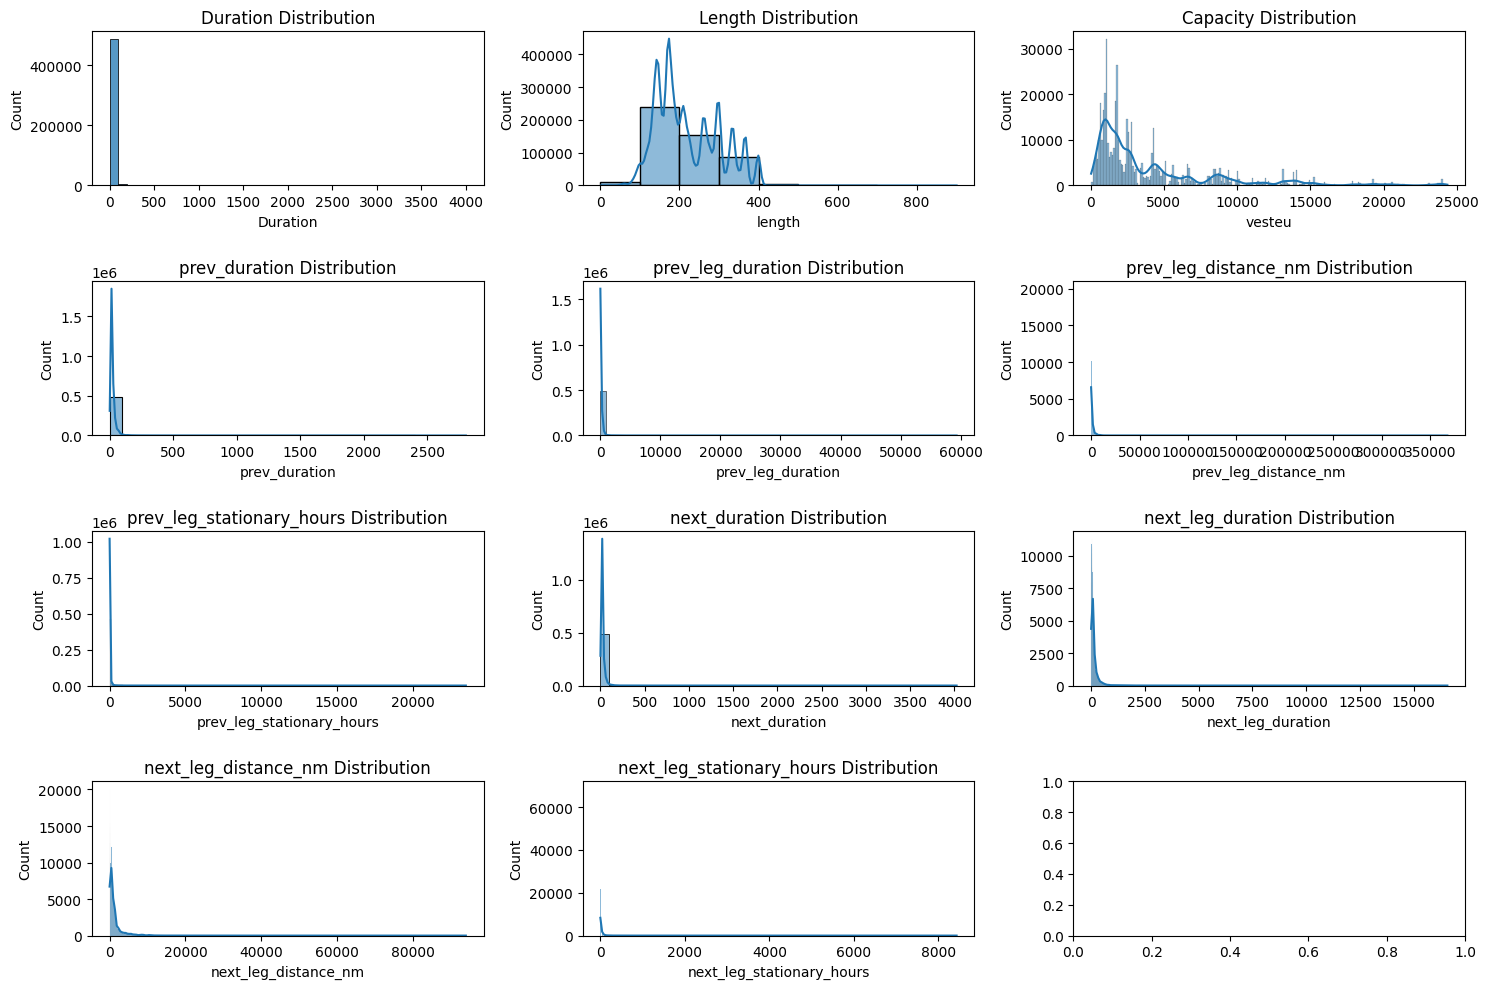

In [17]:
# Create a 4x3 subplot grid for histograms
fig, axs = plt.subplots(4, 3, figsize=(15, 10))

# Flatten the axs array for easier iteration
axs = axs.flatten()

# Plot each histogram in a separate subplot
sns.histplot(data = vessel_data_cleaned_v1, bins = range(0, 4001, 100), x='Duration', ax=axs[0])
axs[0].set_title('Duration Distribution')

sns.histplot(data = vessel_data_cleaned_v1, bins = range(0, 800, 100), kde=True, x='length', ax=axs[1])
axs[1].set_title('Length Distribution')

sns.histplot(data = vessel_data_cleaned_v1, kde=True, x='vesteu', ax=axs[2])
axs[2].set_title('Capacity Distribution')

sns.histplot(data = vessel_data_cleaned_v1, bins = range(0, 2500, 100), kde=True, x='prev_duration', ax=axs[3])
axs[3].set_title('prev_duration Distribution')

sns.histplot(data = vessel_data_cleaned_v1, bins = range(0, 60000, 1000), kde=True, x='prev_leg_duration', ax=axs[4])
axs[4].set_title('prev_leg_duration Distribution')

sns.histplot(data = vessel_data_cleaned_v1, kde=True, x='prev_leg_distance_nm', ax=axs[5])
axs[5].set_title('prev_leg_distance_nm Distribution')

sns.histplot(data = vessel_data_cleaned_v1, bins = range(0, 20000, 100), kde=True, x='prev_leg_stationary_hours', ax=axs[6])
axs[6].set_title('prev_leg_stationary_hours Distribution')

sns.histplot(data = vessel_data_cleaned_v1, bins = range(0, 4000, 100), kde=True, x='next_duration', ax=axs[7])
axs[7].set_title('next_duration Distribution')

sns.histplot(data = vessel_data_cleaned_v1, kde=True, x='next_leg_duration', ax=axs[8])
axs[8].set_title('next_leg_duration Distribution')

sns.histplot(data = vessel_data_cleaned_v1, kde=True, x='next_leg_distance_nm', ax=axs[9])
axs[9].set_title('next_leg_distance_nm Distribution')

sns.histplot(data = vessel_data_cleaned_v1, kde=True, x='next_leg_stationary_hours', ax=axs[10])
axs[10].set_title('next_leg_stationary_hours Distribution')

# Adjust layout
plt.tight_layout()
plt.show()

Key insights -
- The features exhibit a positive skewness, indicating that the distribution tails extend towards the right side, with the majority of data points concentrated within a certain range.

- Analysis of vessel length data suggests that the majority of vessels fall within the short to mid-range category, with only a small percentage being classified as very long vessels.

- The skewness in vessel capacity distribution indicates that most vessels are operating at high utilization levels, with only a few having a significant amount of available capacity.

- Duration-related features, including previous and next duration, reveal that the majority of shipments are confined within specific time ranges, while a small fraction of shipments require a considerably longer duration.

- Features related to stationary hours demonstrate minimal values, suggesting that ships are maintaining very low stationary hours, possibly indicating efficient operational.


## Categorical Features

In [18]:
categorical_columns = vessel_data_cleaned_v1.select_dtypes(include=['object']).columns
print("Categorical columns:")
print(categorical_columns)

Categorical columns:
Index(['call_id', 'imo', 'vessel_name_ais', 'vessel_type_ais', 'Country',
       'CountryCode', 'Port', 'Terminal', 'Service_name', 'prev_port',
       'prev_call_id', 'next_port', 'next_call_id'],
      dtype='object')


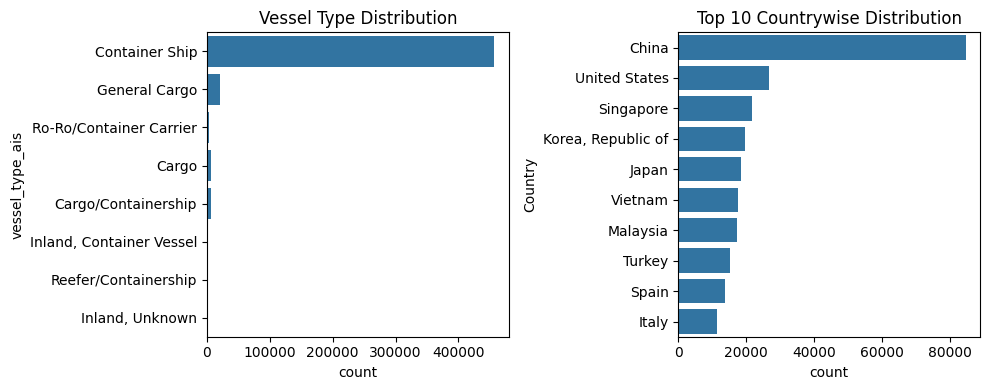

In [19]:
# Create a 1x2 subplot grid
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Plot the Vessel Type Distribution on the first subplot
sns.countplot(data=vessel_data_cleaned_v1, y='vessel_type_ais', ax=axs[0])
axs[0].set_title('Vessel Type Distribution')

# Calculate the top 10 countries by count
top_countries = vessel_data_cleaned_v1['Country'].value_counts().head(10).index
# Filter the data for the top 10 countries
top_countries_data = vessel_data_cleaned_v1[vessel_data_cleaned_v1['Country'].isin(top_countries)]

# Plot the Top 10 Countrywise Distribution on the second subplot
sns.countplot(data=top_countries_data, y='Country', order=top_countries, ax=axs[1])
axs[1].set_title('Top 10 Countrywise Distribution')

# Adjust layout
plt.tight_layout()
plt.show()


Observations -
- Container ships dominate the vessel type segment, emerging as the preferred mode of transport due to their efficiency and capacity.
- Both China and the US emerge as the primary beneficiaries of this transportation channel, showcasing a significant preference for moving a substantial portion of their goods through this efficient mode.

## Feature Engineering

In [49]:
## Creating a feature by adding the duration of previous, current and next port to calculate total time take by the vessel.
duration_features = ['prev_duration', 'prev_leg_duration', 'prev_leg_stationary_hours', 'Duration', 'next_duration', 'next_leg_duration',
                     'next_leg_stationary_hours']
vessel_data_cleaned_v1['total_duration_vessel'] = vessel_data_cleaned_v1[duration_features].sum(axis=1)
vessel_data_cleaned_v1['total_duration_vessel_days'] = vessel_data_cleaned_v1['total_duration_vessel'] / 24

## Creating a feature by adding the distance of previous, current and next port to calculate total distance taken by the vessel.
distance_features = ['prev_leg_distance_nm', 'next_leg_distance_nm']
vessel_data_cleaned_v1['total_distance_vessel'] = vessel_data_cleaned_v1[distance_features].sum(axis=1)

In [21]:
vessel_data_cleaned_v1[['total_duration_vessel', 'total_duration_vessel_days', 'total_distance_vessel']].describe()

,total_duration_vessel,total_duration_vessel_days,total_distance_vessel
count,494468.000000,494468.000000,494468.000000
mean,418.812489,17.450520,2598.301685
std,665.491362,27.728807,3310.228043
min,15.000833,0.625035,0.017461
25%,186.676597,7.778192,891.448820
50%,280.864306,11.702679,1591.036549
75%,459.996944,19.166539,3026.830456
max,66166.200833,2756.925035,375156.234814


Observations -
- 2756 no of days seems incorrect. As this would equal to 7 years. I beleive anything beyond 6 minths to 1 year is too high.

In [22]:
## Dataset records before cleaning
print('Record Count Before Cleaning', vessel_data_cleaned_v1.shape)

def data_cleanup(df):

  return df[(df.total_duration_vessel_days <= 365)]

vessel_data_cleaned_v3 = data_cleanup(vessel_data_cleaned_v1)

print('Record Count After Cleaning', vessel_data_cleaned_v3.shape)

Record Count Before Cleaning (494468, 34)
Record Count After Cleaning (494042, 34)


# 4: Exploring Data - Asking Questions <a name="4"></a>


---
<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

## Q1 - identify the Port and terminals having an average highest stationay hours

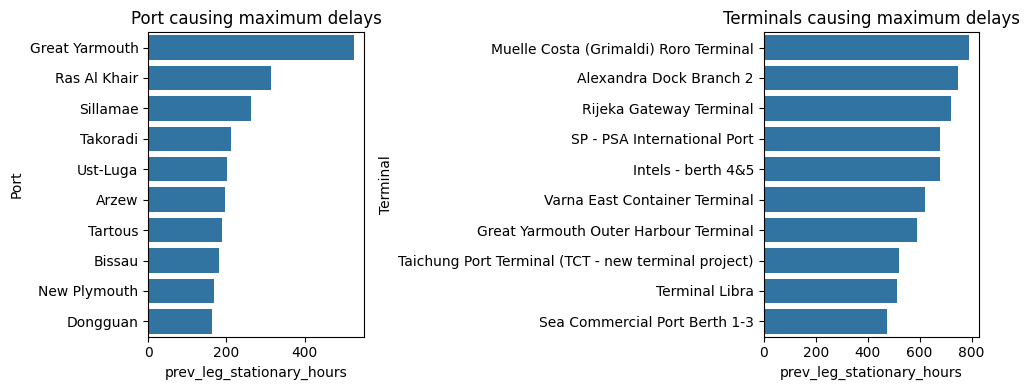

In [21]:
country_port_stat_info = vessel_data_cleaned_v3.groupby(['Country','Port'])['prev_leg_stationary_hours'].mean().\
                          reset_index().sort_values(by='prev_leg_stationary_hours', ascending=False)
port_terminal_stat_info = vessel_data_cleaned_v3.groupby(['Port','Terminal'])['prev_leg_stationary_hours'].mean().\
                          reset_index().sort_values(by='prev_leg_stationary_hours', ascending=False)

# Create a 1x2 subplot grid
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

sns.barplot(country_port_stat_info.head(10), y="Port", x="prev_leg_stationary_hours", ax=axs[0])
axs[0].set_title('Port causing maximum delays')

sns.barplot(port_terminal_stat_info.head(10), y="Terminal", x="prev_leg_stationary_hours", ax=axs[1])
axs[1].set_title('Terminals causing maximum delays')

# Adjust layout
plt.tight_layout()
plt.show()

## Q2 Ports with highest number of terminals and counteris with highest number of ports

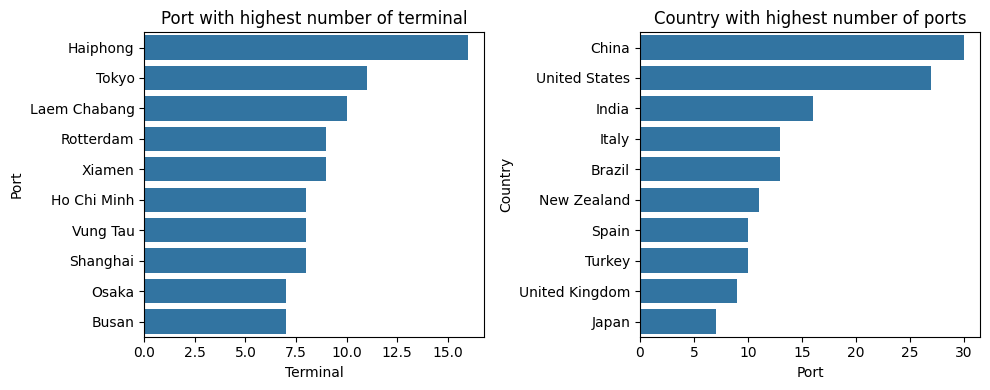

In [22]:
port_terminal_high = vessel_data_cleaned_v3[['Port','Terminal']].drop_duplicates().groupby(['Port'])['Terminal'].count(). \
                      reset_index().sort_values(by='Terminal', ascending=False)
country_port_high = vessel_data_cleaned_v3[['Country','Port']].drop_duplicates().groupby(['Country'])['Port'].count(). \
                      reset_index().sort_values(by='Port', ascending=False)

# Create a 1x2 subplot grid
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

sns.barplot(port_terminal_high.head(10), y="Port", x="Terminal", ax=axs[0])
axs[0].set_title('Port with highest number of terminal')

sns.barplot(country_port_high.head(10), y="Country", x="Port", ax=axs[1])
axs[1].set_title('Country with highest number of ports')

# Adjust layout
plt.tight_layout()
plt.show()

## Q3 Identifying countries with maximum and minimum number of days in shipments

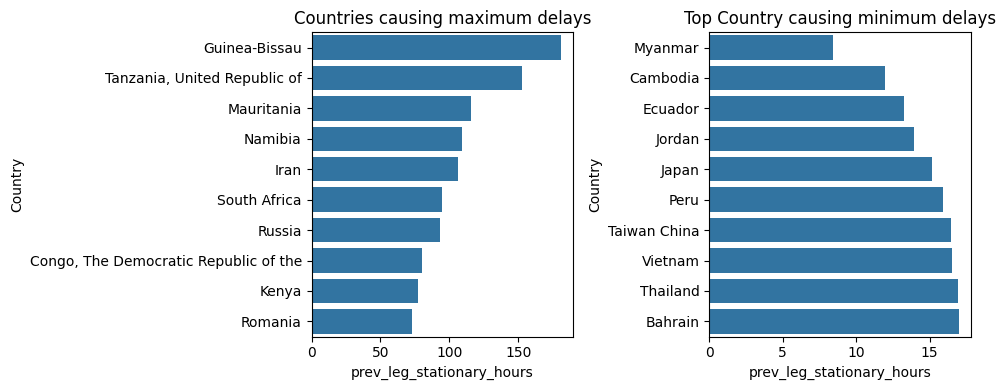

In [23]:
country_delay_max = vessel_data_cleaned_v3.groupby(['Country'])['prev_leg_stationary_hours'].mean().reset_index().\
                    sort_values(by='prev_leg_stationary_hours', ascending=False)
country_delay_min = vessel_data_cleaned_v3.groupby(['Country'])['prev_leg_stationary_hours'].mean().reset_index().\
                    sort_values(by='prev_leg_stationary_hours', ascending=True)
# Create a 1x2 subplot grid
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

sns.barplot(country_delay_max.head(10), y="Country", x="prev_leg_stationary_hours", ax=axs[0])
axs[0].set_title('Countries causing maximum delays')

sns.barplot(country_delay_min.head(10), y="Country", x="prev_leg_stationary_hours", ax=axs[1])
axs[1].set_title('Top Country causing minimum delays')

# Adjust layout
plt.tight_layout()
plt.show()

## Q4: Duration Vs Distance

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


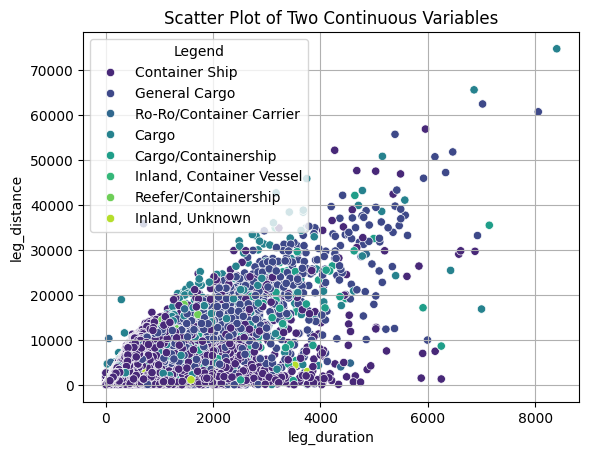

In [24]:
sns.scatterplot(x=vessel_data_cleaned_v3.prev_leg_duration, y=vessel_data_cleaned_v3.prev_leg_distance_nm, \
                hue = vessel_data_cleaned_v3.vessel_type_ais, palette='viridis')
plt.title('Scatter Plot of Two Continuous Variables')
plt.xlabel('leg_duration')
plt.ylabel('leg_distance')
plt.legend(title='Legend')
plt.grid(True)
plt.grid(True)
plt.show()

## Q5 Impact of length and capacity of vessel on duration of travel from previous port to current port

<ipython-input-25-583779131c91>:13: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


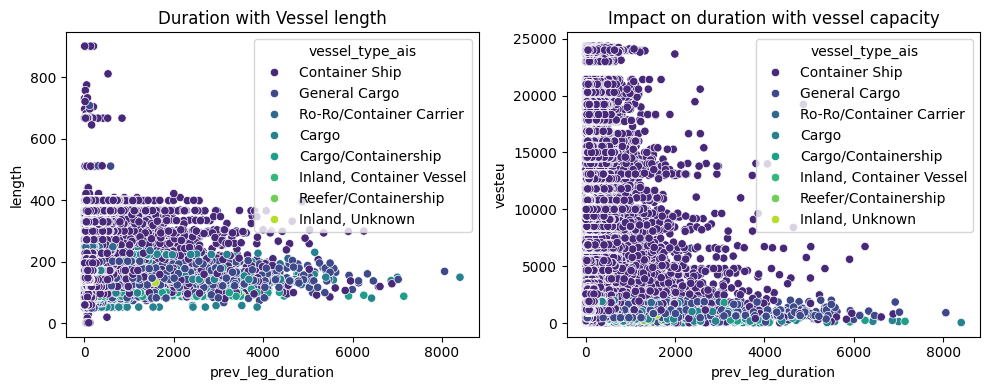

In [25]:
# Create a 1x2 subplot grid
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

sns.scatterplot(x=vessel_data_cleaned_v3.prev_leg_duration, y=vessel_data_cleaned_v3.length, \
                hue = vessel_data_cleaned_v3.vessel_type_ais, palette='viridis', ax=axs[0])
axs[0].set_title('Duration with Vessel length')

sns.scatterplot(x=vessel_data_cleaned_v3.prev_leg_duration, y=vessel_data_cleaned_v3.vesteu, \
                hue = vessel_data_cleaned_v3.vessel_type_ais, palette='viridis', ax=axs[1])
axs[1].set_title('Impact on duration with vessel capacity')

# Adjust layout
plt.tight_layout()
plt.show()

## Q6: Relation between Vessel capacity and vessel length

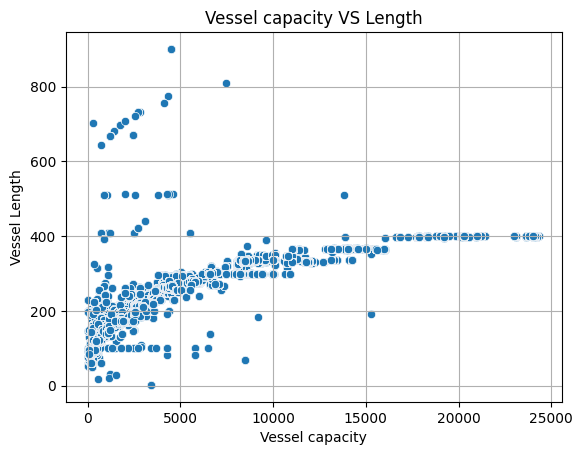

In [26]:
sns.scatterplot(x=vessel_data_cleaned_v3.vesteu, y=vessel_data_cleaned_v3.length)
plt.title('Vessel capacity VS Length')
plt.xlabel('Vessel capacity')
plt.ylabel('Vessel Length')
plt.grid(True)
plt.show()

## Q7: Seasonal Variations

In [ ]:
season_mapping = {1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring', 6: 'Summer',
                  7: 'Summer', 8: 'Summer', 9: 'Fall', 10: 'Fall', 11: 'Fall', 12: 'Winter'}

# Populate season based on the month
vessel_data_cleaned_v3['season'] = vessel_data_cleaned_v3['arrival_date'].dt.month.map(season_mapping)

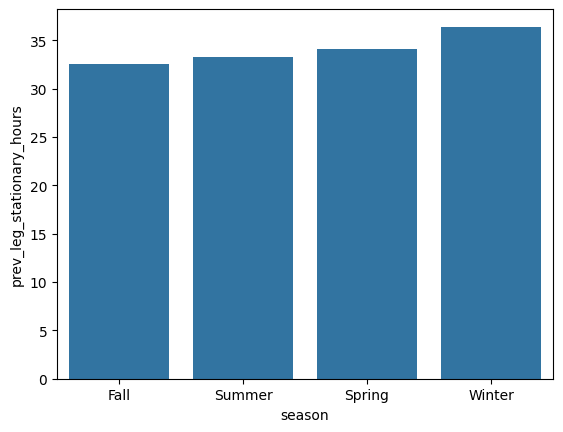

In [83]:
seasonal_data = pd.DataFrame(vessel_data_cleaned_v3[['season', 'prev_leg_stationary_hours']].groupby(by='season')['prev_leg_stationary_hours'].\
                             mean().reset_index())
sns.barplot(seasonal_data.sort_values(by='prev_leg_stationary_hours'), y="prev_leg_stationary_hours", x="season")
plt.show()

## Q8: Times of the day Vs Waiting time

In [50]:
def categorize_time_of_day(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'

vessel_data_cleaned_v3['time_of_day'] = vessel_data_cleaned_v3['arrival_time'].dt.hour.apply(categorize_time_of_day)

vessel_day_after_night_data = pd.DataFrame(vessel_data_cleaned_v3[['time_of_day', 'prev_leg_stationary_hours']].groupby(by='time_of_day')['prev_leg_stationary_hours'].\
                             mean().reset_index())

def categorize_time_of_day_detailed(hour):
    if 0 <= hour < 6:
        return 'Late Night'
    elif 6 <= hour < 9:
        return 'Early Morning'
    elif 9 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 15:
        return 'Early Afternoon'
    elif 15 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

# Extract the hour from the datetime column and categorize time of day
vessel_data_cleaned_v3['time_of_day_detailed'] = vessel_data_cleaned_v3['arrival_time'].dt.hour.apply(categorize_time_of_day_detailed)

vessel_day_after_night_detailed_data = pd.DataFrame(vessel_data_cleaned_v3[['time_of_day_detailed', 'prev_leg_stationary_hours']].groupby(by='time_of_day_detailed')['prev_leg_stationary_hours'].\
                             mean().reset_index())

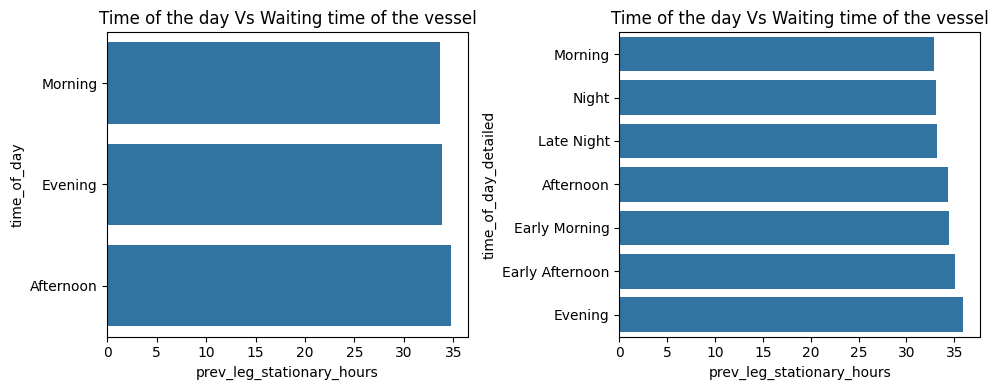

In [30]:
# Create a 1x2 subplot grid
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# sns.scatterplot(x=vessel_data_cleaned_v3.prev_leg_duration, y=vessel_data_cleaned_v3.length, \
#                 hue = vessel_data_cleaned_v3.vessel_type_ais, palette='viridis', ax=axs[0])
sns.barplot(vessel_day_after_night_data.sort_values(by='prev_leg_stationary_hours'), x="prev_leg_stationary_hours", y="time_of_day", ax=axs[0])
axs[0].set_title('Time of the day Vs Waiting time of the vessel')

# sns.scatterplot(x=vessel_data_cleaned_v3.prev_leg_duration, y=vessel_data_cleaned_v3.vesteu, \
#                 hue = vessel_data_cleaned_v3.vessel_type_ais, palette='viridis', ax=axs[1])
sns.barplot(vessel_day_after_night_detailed_data.sort_values(by='prev_leg_stationary_hours'), \
            x="prev_leg_stationary_hours", y="time_of_day_detailed", ax=axs[1])
axs[1].set_title('Time of the day Vs Waiting time of the vessel')

# Adjust layout
plt.tight_layout()
plt.show()

In [31]:
vessel_data_cleaned_v3.columns

Index(['call_id', 'arrival_date', 'departure_date', 'arrival_time',
       'departure_time', 'imo', 'vessel_name_ais', 'vessel_type_ais',
       'Country', 'CountryCode', 'Port', 'Terminal', 'Duration',
       'Service_name', 'length', 'prev_departure_time', 'vesteu', 'prev_port',
       'prev_arrival_time', 'prev_duration', 'prev_leg_duration',
       'prev_leg_distance_nm', 'prev_leg_stationary_hours', 'prev_call_id',
       'next_port', 'next_arrival_time', 'next_duration', 'next_leg_duration',
       'next_leg_distance_nm', 'next_leg_stationary_hours', 'next_call_id',
       'total_duration_vessel', 'total_duration_vessel_days',
       'total_distance_vessel', 'time_of_day', 'time_of_day_detailed'],
      dtype='object')

## Q9 : Vessel Characterstics

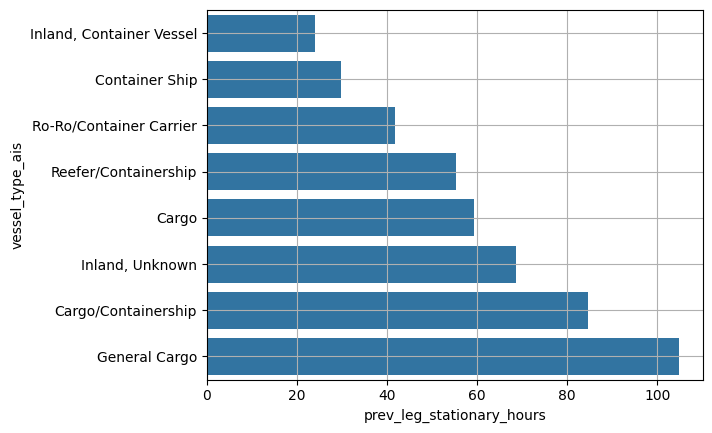

In [33]:
vessel_char_waiting = vessel_data_cleaned_v3[['vessel_type_ais', 'prev_leg_stationary_hours']].groupby(by='vessel_type_ais')['prev_leg_stationary_hours'].\
                             mean().reset_index()

sns.barplot(vessel_char_waiting.sort_values(by='prev_leg_stationary_hours'), \
            x="prev_leg_stationary_hours", y="vessel_type_ais")

plt.grid()
plt.show()

## Q10: Some more exploration on time

In [51]:
def part_of_dates(df, column):
  df[column+ '_year']= df[column].dt.year
  df[column+ '_month']= df[column].dt.month
  df[column+ '_day']= df[column].dt.weekday
  df[column+ '_hour']= df[column].dt.hour

part_of_dates(vessel_data_cleaned_v3,'arrival_time')

In [24]:
vessel_data_cleaned_v3.columns

Index(['call_id', 'arrival_date', 'departure_date', 'arrival_time',
       'departure_time', 'imo', 'vessel_name_ais', 'vessel_type_ais',
       'Country', 'CountryCode', 'Port', 'Terminal', 'Duration',
       'Service_name', 'length', 'prev_departure_time', 'vesteu', 'prev_port',
       'prev_arrival_time', 'prev_duration', 'prev_leg_duration',
       'prev_leg_distance_nm', 'prev_leg_stationary_hours', 'prev_call_id',
       'next_port', 'next_arrival_time', 'next_duration', 'next_leg_duration',
       'next_leg_distance_nm', 'next_leg_stationary_hours', 'next_call_id',
       'total_duration_vessel', 'total_duration_vessel_days',
       'total_distance_vessel', 'arrival_time_year', 'arrival_time_month',
       'arrival_time_day', 'arrival_time_hour'],
      dtype='object')

In [37]:
year_wise_wait_time = vessel_data_cleaned_v3[['arrival_time_year', 'prev_leg_stationary_hours']].groupby(by='arrival_time_year')['prev_leg_stationary_hours'].\
                             mean().reset_index()
month_wise_wait_time = vessel_data_cleaned_v3[['arrival_time_month', 'prev_leg_stationary_hours']].groupby(by='arrival_time_month')['prev_leg_stationary_hours'].\
                             mean().reset_index()
day_wise_wait_time = vessel_data_cleaned_v3[['arrival_time_day', 'prev_leg_stationary_hours']].groupby(by='arrival_time_day')['prev_leg_stationary_hours'].\
                             mean().reset_index()
hour_wise_wait_time = vessel_data_cleaned_v3[['arrival_time_hour', 'prev_leg_stationary_hours']].groupby(by='arrival_time_hour')['prev_leg_stationary_hours'].\
                             mean().reset_index()

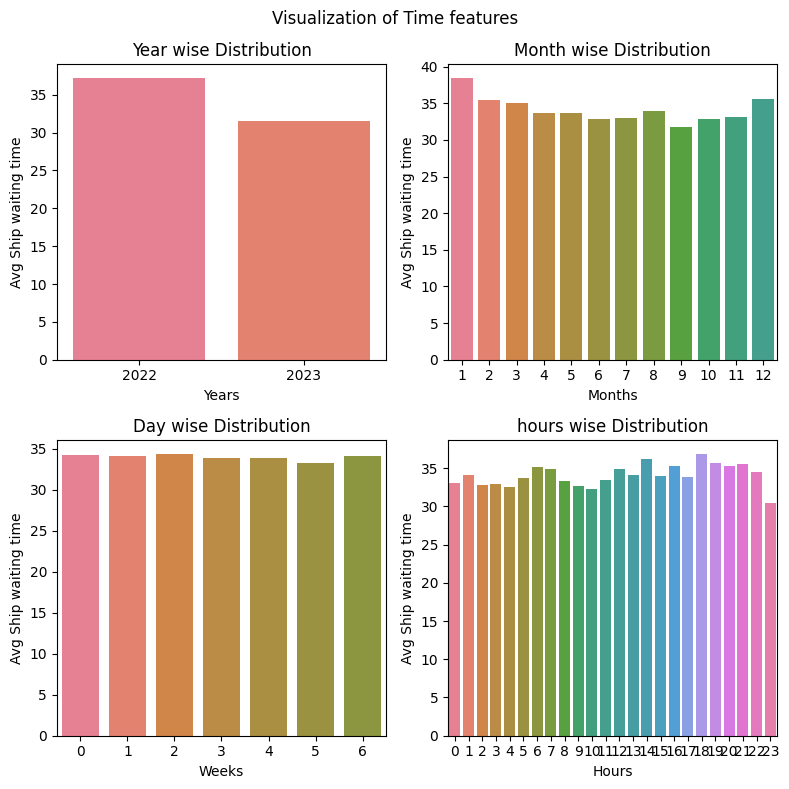

In [52]:
fig, axes = plt.subplots(2, 2, figsize=(8,8))
fig.suptitle('Visualization of Time features')

# Define a custom color palette with different colors for each bar
custom_palette = sns.color_palette("husl", n_colors=len(hour_wise_wait_time))

## Yearly Analysis
sns.barplot(ax=axes[0,0], x= year_wise_wait_time.arrival_time_year, y = year_wise_wait_time.prev_leg_stationary_hours, palette=custom_palette)
axes[0,0].set_title('Year wise Distribution')
axes[0,0].set_xlabel('Years');
axes[0,0].set_ylabel('Avg Ship waiting time');

## Monthly Analysis
sns.barplot(ax=axes[0,1], x= month_wise_wait_time.arrival_time_month, y = month_wise_wait_time.prev_leg_stationary_hours, palette=custom_palette);
axes[0,1].set_title('Month wise Distribution')
axes[0,1].set_xlabel('Months');
axes[0,1].set_ylabel('Avg Ship waiting time');

## Weekly Analysis
sns.barplot(ax=axes[1,0], x= day_wise_wait_time.arrival_time_day, y = day_wise_wait_time.prev_leg_stationary_hours, palette=custom_palette);
axes[1,0].set_title('Day wise Distribution')
axes[1,0].set_xlabel('Weeks');
axes[1,0].set_ylabel('Avg Ship waiting time');

## Hourly Analysis
sns.barplot(ax=axes[1,1], x= hour_wise_wait_time.arrival_time_hour, y = hour_wise_wait_time.prev_leg_stationary_hours, palette=custom_palette);
axes[1,1].set_title('hours wise Distribution')
axes[1,1].set_xlabel('Hours');
axes[1,1].set_ylabel('Avg Ship waiting time')

plt.tight_layout()
plt.show()

# 5: Summary <a name="5"></a>


---
<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

The notebook primarly performs explainatory data analysis.

Following are some key conclusion as an outcome of this analysis

- The features exhibit a positive skewness, indicating that the distribution tails extend towards the right side, with the majority of data points concentrated within a certain range.
- The skewness in vessel capacity distribution indicates that most vessels are operating at high utilization levels, with only a few having a significant amount of available capacity.
- Container ships dominate the vessel type segment, emerging as the preferred mode of transport due to their efficiency and capacity.
- Both China and the US emerge as the primary beneficiaries of this transportation channel, showcasing a significant preference for moving a substantial portion of their goods through this efficient mode.
- Identified the ports and terminals that are responsible for the most significant delays.
- Determined the terminals and countries with the highest number of ports.
- Analyzed the countries causing the most delays and those that have the quickest turnaround times.
- Observed a positive correlation between vessel travel duration and distance.
- Found no significant relationship between vessel length/capacity and duration.
- Noticed a weak correlation between vessel length and capacity.
- Seasonal delays - Vessel waiting time is maximum during winter and lowest during fall.
- During the time of the day, The waiting time is maximum if the ship arrives at the evening and minimal if the ship arrives at the morning.
- General cargo vessel types faces maximum waiting time whereas container vessel seems to maintain the minimal time.


# 6: Future Work <a name="6"></a>


---
<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

- Using caller ID, Identify shipment to track longest routes and most time consuming routes
- Adding wheather information in the current data
- Port and country specific trends on waiting hours trends (like daywise, monthly...etc)

# 7: References <a name="7"></a>


---
<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

- pandas - https://pandas.pydata.org/docs/
- seaborn - https://seaborn.pydata.org/
- matplotlib - https://matplotlib.org/stable/index.html

# **The End**